In [1]:
ls \

 驱动器 C 中的卷是 系统
 卷的序列号是 2859-C42A

 C:\Users\PC\Desktop\kesci_ctrip 的目录

2017/03/17  16:20    <DIR>          .
2017/03/17  16:20    <DIR>          ..
2017/03/17  16:16    <DIR>          .ipynb_checkpoints
2017/03/16  14:25         1,344,469 2014月乘以1.1_236.247045.csv
2017/03/16  14:22         1,163,228 2014月乘以1.25_236.597764.csv
2017/03/16  14:25         1,344,469 236.csv
2017/03/17  16:07         1,294,066 6186.csv
2017/03/17  16:07         1,294,066 6186nn.csv
2017/03/16  08:38           505,816 ctrip.html
2017/03/16  14:26           554,266 ctrip.ipynb
2017/03/17  15:48           243,523 ctrip_nn.ipynb
2017/03/16  12:10           613,720 dlnd-your-first-neural-network.html
2017/03/15  16:17                 0 log.txt
2017/03/17  16:19         1,341,610 my_ansower.csv
2017/03/06  17:56           598,196 product_info.txt
2017/03/06  18:03        64,183,416 product_quantity.txt
2017/03/09  15:11         1,160,549 submit.txt
2017/03/17  16:20            32,670 Untitled.ipynb
              

In [2]:
#导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#读取数据
evaluation=pd.read_csv('submit.txt')
product_info=pd.read_csv('product_info.txt')
product_quantity=pd.read_csv('product_quantity.txt')

In [4]:
#显示数据尺寸
print(evaluation.shape)
print(product_info.shape)
print(product_quantity.shape)

(56000, 3)
(4000, 22)
(1959676, 9)


In [5]:
#显示product_info数据格式
evaluation.head()

,product_id,product_month,ciiquantity_month
0,1,2015-12-01,100
1,2,2015-12-01,100
2,3,2015-12-01,100
3,4,2015-12-01,100
4,5,2015-12-01,100


In [6]:
#显示product_info数据格式
product_info.head()

,product_id,district_id1,district_id2,district_id3,district_id4,lat,lon,railway,airport,citycenter,...,citycenter2,eval,eval2,eval3,eval4,voters,startdate,upgradedate,cooperatedate,maxstock
0,1,10201,20502,31003,45760,3.994928,11.634630,-1.0,-1.0,-1.0,...,-1.0,3.0,5,2.0,3.1,1034.0,2005-11-01,2015-01-01,2013-07-02,75.0
1,2,10201,20502,31003,45760,3.995148,11.636258,-1.0,-1.0,2.3,...,-1.0,3.0,4,2.0,3.4,1707.0,2005-02-28,2011-01-01,2014-12-16,172.0
2,3,10201,20502,31003,45760,3.994291,11.631246,-1.0,-1.0,10.3,...,-1.0,3.0,4,2.5,3.6,1739.0,2007-03-01,2014-01-01,2014-07-02,188.0
3,4,10201,20502,31003,55952,3.997783,11.641561,-1.0,-1.0,9.3,...,-1.0,3.0,4,2.5,3.5,1065.0,2006-07-01,1753-01-01,2014-12-19,116.0
4,5,10201,20502,31003,55952,3.999904,11.641149,12.1,25.2,13.3,...,3.6,3.0,5,2.0,3.4,2209.0,2007-01-01,2012-03-01,2007-11-07,95.0


In [7]:
#显示product_quantity数据格式
product_quantity.head()

,product_id,product_date,orderattribute1,orderattribute2,orderattribute3,orderattribute4,ciiquantity,ordquantity,price
0,1,2014-06-21,2,1,1,1,0,1,-1
1,1,2014-09-03,2,1,1,1,1,3,153
2,1,2014-09-26,2,1,1,1,0,3,-1
3,1,2014-11-28,2,1,1,1,0,4,-1
4,1,2014-01-11,2,1,1,1,1,1,153


# 以上数据导入完成
# ————————————————————————————————————

In [8]:
train_day=product_quantity.groupby(['product_id','product_date']).sum()['ciiquantity'].unstack()#.mean(axis=1)
train_day.head()

product_date,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30
product_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,NaN,NaN,NaN,0.0,3.0,1.0,3.0,0.0,...,7.0,0.0,NaN,1.0,0.0,0.0,3.0,5.0,1.0,1.0
2,0.0,NaN,1.0,NaN,4.0,4.0,1.0,3.0,3.0,3.0,...,7.0,9.0,9.0,2.0,NaN,2.0,1.0,7.0,8.0,9.0
3,0.0,1.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,13.0,8.0,10.0,8.0,7.0,6.0,18.0,18.0,5.0,8.0
4,0.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,3.0,8.0,...,6.0,4.0,1.0,0.0,1.0,3.0,6.0,10.0,6.0,4.0
5,1.0,NaN,1.0,2.0,2.0,7.0,4.0,2.0,2.0,0.0,...,3.0,4.0,2.0,1.0,3.0,4.0,2.0,0.0,2.0,1.0


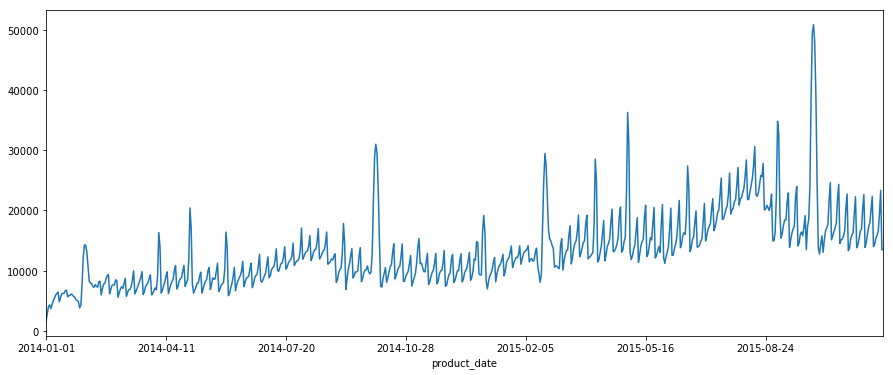

In [9]:
train_day.sum().plot(figsize=(15,6))

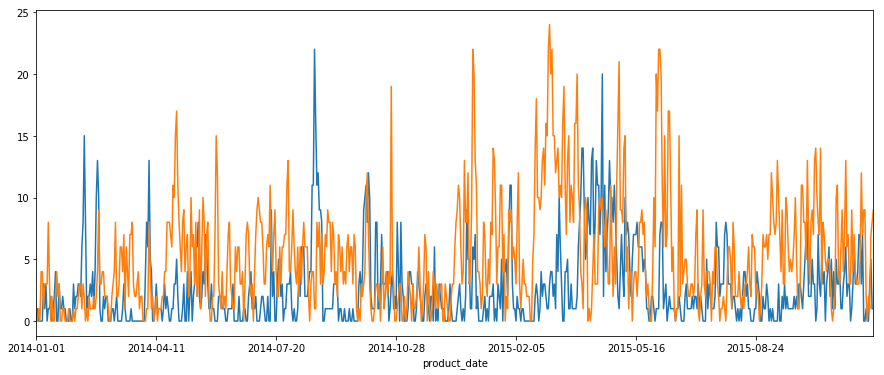

In [10]:
for i in range(2):
    train_day[train_day.index==i+1].sum().plot(figsize=(15,6))

In [13]:
product_quantity['product_month']=product_quantity['product_date'].apply(lambda x: x[0:7])
train_month=product_quantity.groupby(['product_id','product_month']).sum()['ciiquantity'].unstack()
train_month.ix[:,0:12]

product_month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12
product_id,,,,,,,,,,,,
1,29.0,111.0,13.0,71.0,74.0,30.0,55.0,159.0,35.0,134.0,57.0,51.0
2,46.0,59.0,104.0,144.0,167.0,117.0,194.0,148.0,138.0,109.0,65.0,162.0
3,29.0,41.0,88.0,72.0,159.0,143.0,57.0,125.0,497.0,104.0,72.0,537.0
4,72.0,115.0,117.0,121.0,115.0,103.0,92.0,92.0,92.0,187.0,81.0,129.0
5,98.0,40.0,106.0,72.0,105.0,132.0,88.0,120.0,65.0,146.0,93.0,92.0
6,41.0,86.0,207.0,256.0,263.0,157.0,143.0,181.0,151.0,188.0,144.0,35.0
7,45.0,11.0,3.0,22.0,96.0,37.0,116.0,98.0,81.0,190.0,150.0,109.0
8,61.0,111.0,101.0,69.0,112.0,74.0,143.0,134.0,75.0,96.0,117.0,89.0
9,43.0,62.0,111.0,127.0,275.0,62.0,86.0,53.0,96.0,84.0,35.0,27.0


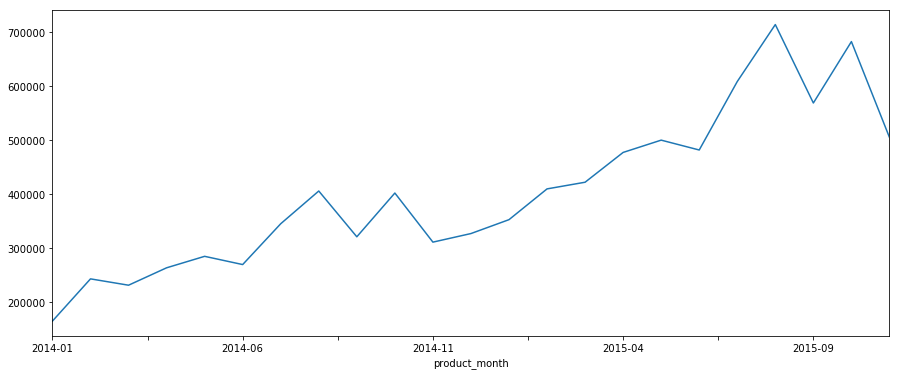

In [12]:
train_month.sum().plot(figsize=(15,6))

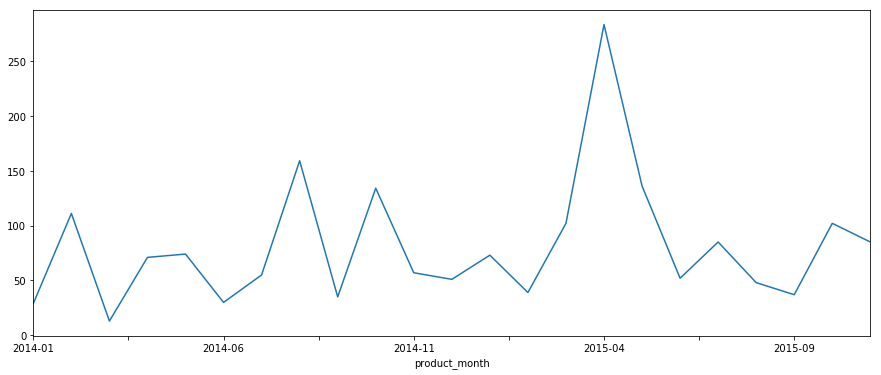

In [13]:
for i in range(1):
    train_month[train_month.index==i+1].sum().plot(figsize=(15,6))


In [17]:
def produce2015(index):
    product_id=evaluation['product_id'][index]
    product_month=evaluation['product_month'][index]    
    try:  
        return train_month['2015-'+product_month[5:7]][product_id]*1.1
    except Exception as err:    
        return 0
evaluation.ciiquantity_month=evaluation.index.map(produce2015)
def produce2014(index):
    product_id=evaluation['product_id'][index]
    product_month=evaluation['product_month'][index]    
    try:  
        return train_month['2014-'+product_month[5:7]][product_id]*1.2
    except Exception as err:    
        return 0
evaluation[0:4000].ciiquantity_month=evaluation[0:4000].index.map(produce2014)
evaluation.to_csv('my_ansower.csv',index=False)
evaluation.head()

E:\zchq88\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,product_id,product_month,ciiquantity_month
0,1,2015-12-01,61.2
1,2,2015-12-01,194.4
2,3,2015-12-01,644.4
3,4,2015-12-01,154.8
4,5,2015-12-01,110.4


In [18]:
evaluation

,product_id,product_month,ciiquantity_month
0,1,2015-12-01,61.2
1,2,2015-12-01,194.4
2,3,2015-12-01,644.4
3,4,2015-12-01,154.8
4,5,2015-12-01,110.4
5,6,2015-12-01,42.0
6,7,2015-12-01,130.8
7,8,2015-12-01,106.8
8,9,2015-12-01,32.4
9,10,2015-12-01,157.2


# 以上通过月份简单预测
# ————————————————————————————————————

In [15]:
#train_day=product_quantity
train_day=pd.DataFrame({'product_id':product_quantity.product_id,'ciiquantity':product_quantity.ciiquantity,'product_date':product_quantity.product_date,})
train_day=train_day.sort_values(by =['product_id','product_date'])
train_day[0:10]

,ciiquantity,product_date,product_id
27,0,2014-01-01,1
167,1,2014-01-02,1
57,0,2014-01-06,1
66,3,2014-01-07,1
209,1,2014-01-08,1
288,3,2014-01-09,1
45,0,2014-01-10,1
4,1,2014-01-11,1
166,1,2014-01-12,1
241,2,2014-01-13,1


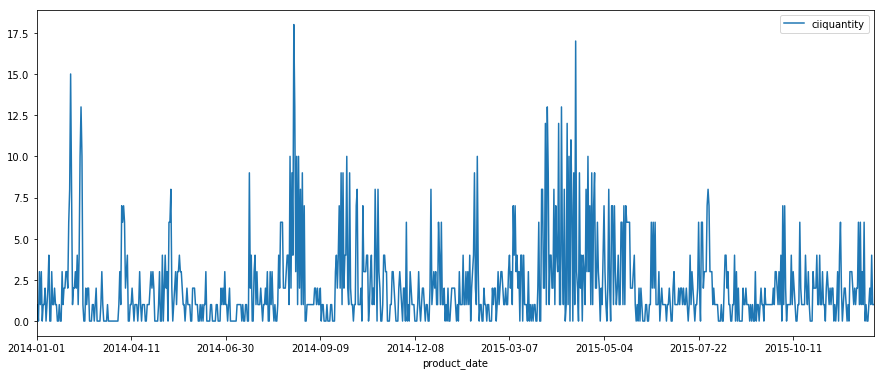

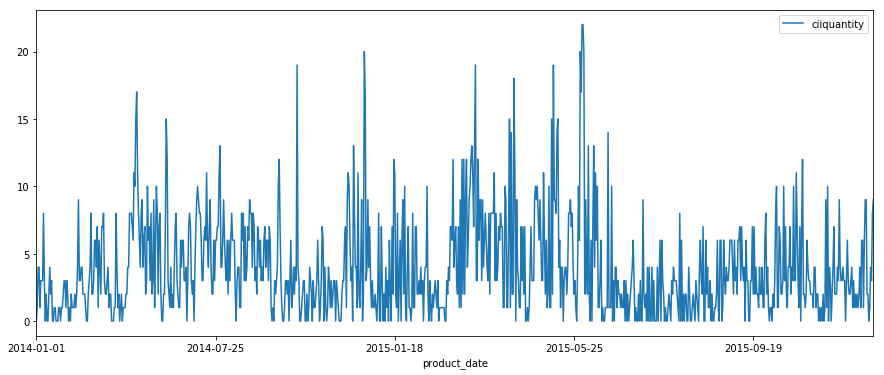

In [21]:
for i in range(2):
    train_day[train_day['product_id']==i+1].plot(x='product_date', y='ciiquantity',figsize=(15,6))

In [72]:
Ttrain_day=train_day[0:5]
Ttrain_day

,ciiquantity,product_date,product_id
27,0,2014-01-01,1
167,1,2014-01-02,1
57,0,2014-01-06,1
66,3,2014-01-07,1
209,1,2014-01-08,1


In [75]:
from datetime import datetime
pd.options.mode.chained_assignment = None #禁止SettingWithCopyWarning 警告
Ttrain_day=train_day[0:5]
def getweek(product_date):
    yyyy=int(product_date[0:4])
    mm=int(product_date[5:7])
    dd=int(product_date[8:10])
    return datetime(yyyy,mm,dd).weekday()+1

def addweekday(table):
    table['week']=table['product_date'].apply(getweek)
    dummies = pd.get_dummies(Ttrain_day['week'], prefix='week', drop_first=False)
    table = pd.concat([Ttrain_day, dummies], axis=1)
    table = table.drop('week', axis=1)
    return table
Ttrain_day=addweekday(Ttrain_day)
Ttrain_day

,ciiquantity,product_date,product_id,week_1,week_2,week_3,week_4
27,0,2014-01-01,1,0,0,1,0
167,1,2014-01-02,1,0,0,0,1
57,0,2014-01-06,1,1,0,0,0
66,3,2014-01-07,1,0,1,0,0
209,1,2014-01-08,1,0,0,1,0


In [96]:
Ttrain_day=train_day[0:5]
Ttrain_day=addweekday(Ttrain_day)
def addfeature(table,features):
    for feature in features:
        table[feature]=table['product_id'].apply(lambda x: product_info[product_info.product_id==x][feature])
    table=table.drop('product_id', 1)
    return table
features=['eval','eval2','eval3','eval4','voters','maxstock']
Ttrain_day=addfeature(Ttrain_day,features)
Ttrain_day

,ciiquantity,product_date,week_1,week_2,week_3,week_4,eval,eval2,eval3,eval4,voters,maxstock
27,0,2014-01-01,0,0,1,0,3.0,5,2.0,3.1,1034.0,75.0
167,1,2014-01-02,0,0,0,1,3.0,5,2.0,3.1,1034.0,75.0
57,0,2014-01-06,1,0,0,0,3.0,5,2.0,3.1,1034.0,75.0
66,3,2014-01-07,0,1,0,0,3.0,5,2.0,3.1,1034.0,75.0
209,1,2014-01-08,0,0,1,0,3.0,5,2.0,3.1,1034.0,75.0


In [118]:
Ttrain_day=train_day[0:5]
Ttrain_day=addweekday(Ttrain_day)
Ttrain_day=addfeature(Ttrain_day,features)
def Scalingfeature(table,features):
    for feature in features:
        mean, std = product_info[feature].mean(), product_info[feature].std()
        table.loc[:, feature] = (table[feature] - mean)/std
    return table
features=['eval','eval2','eval3','eval4','voters','maxstock']
Ttrain_day=Scalingfeature(Ttrain_day,features)
Ttrain_day

,ciiquantity,product_date,week_1,week_2,week_3,week_4,eval,eval2,eval3,eval4,voters,maxstock
27,0,2014-01-01,0,0,1,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
167,1,2014-01-02,0,0,0,1,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
57,0,2014-01-06,1,0,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
66,3,2014-01-07,0,1,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
209,1,2014-01-08,0,0,1,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165


In [122]:
features=['eval','eval2','eval3','eval4','voters','maxstock']
Ttrain_day=train_day[0:500]
Ttrain_day=addweekday(Ttrain_day)
Ttrain_day=addfeature(Ttrain_day,features)
Ttrain_day=Scalingfeature(Ttrain_day,features)
Ttrain_day.head()

,ciiquantity,product_date,week_1,week_2,week_3,week_4,week_5,week_6,week_7,eval,eval2,eval3,eval4,voters,maxstock
27,0,2014-01-01,0,0,1,0,0,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
167,1,2014-01-02,0,0,0,1,0,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
57,0,2014-01-06,1,0,0,0,0,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
66,3,2014-01-07,0,1,0,0,0,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
209,1,2014-01-08,0,0,1,0,0,0,0,-0.800491,0.261345,-0.712015,-0.830884,-0.266098,-0.529165
